# Predicting 10-year CVD risk score

Dataset - UCI Cleveland Heart Disease Dataset

### Dataset Description:
1. #3 age (in years)
2. #4 sex (0 = female, 1 = male)
3. #9 cp: chest pain type ( 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
4. #10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. #12 chol: serum cholestoral in mg/dl
6. #16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 restecg: resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. #32 thalach: maximum heart rate achieved 
9. #38 exang: exercise induced angina (1 = yes; 0 = no) 
10. #40 oldpeak: ST depression induced by exercise relative to rest  
11. #41 slope: the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
12. #44 ca: number of major vessels (0-3) colored by flourosopy  
13. #51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect  
14. #58 target (the predicted attribute); num: diagnosis of heart disease (angiographic disease status) (0: < 50% diameter narrowing, 1: > 50% diameter narrowing) (MAPPED TO 0 or 1 from 1 to 4)

In [28]:
from functions import *
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy.stats import uniform
# importing ML models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit


In [29]:
# Load and prepare the dataset
data = pd.read_csv('Cleveland.csv')
data = prepare_data(data)
data.dropna()
data.isnull().sum()

# Split the dataset into training and test sets
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
# Using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [30]:
# import pandas_profiling as pp
# pp.ProfileReport(data)

## Correlation Matrix

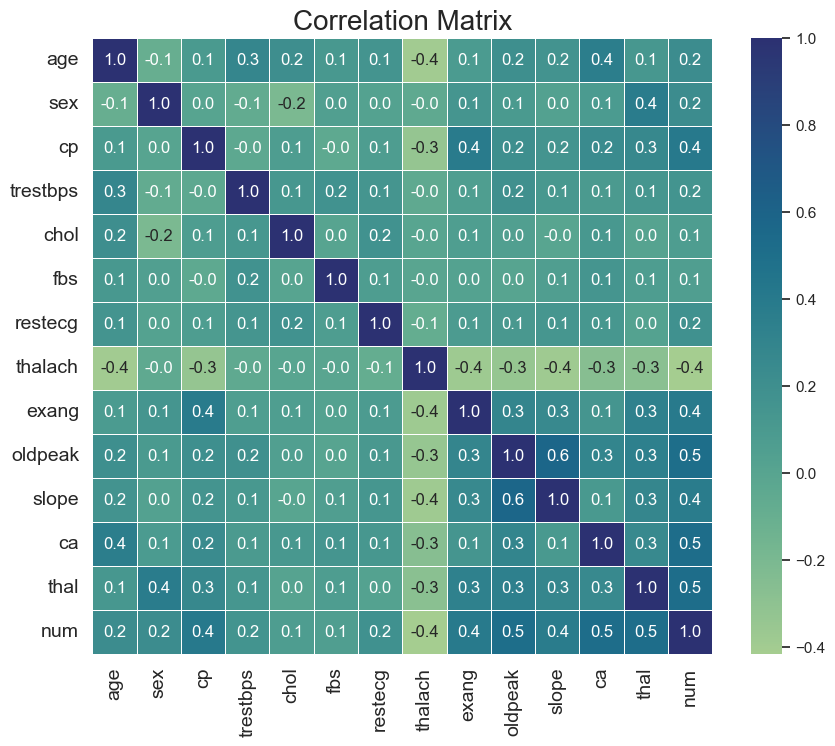

In [31]:
# Calculate the correlation matrix
# data=scaled_features
corr_matrix = data.corr()

# Create figure object and set size
fig, ax = plt.subplots(figsize=(10, 8))
# Set font size
sns.set(font_scale=1)
# Create heatmap
sns.heatmap(corr_matrix, cmap="crest", center=None, linecolor='white', annot=True, fmt=".1f", linewidth=.5)


plt.xticks(fontsize=14, fontweight='normal')
plt.yticks(fontsize=14, fontweight='normal')

# Set font properties for title
plt.title('Correlation Matrix', fontsize=20)

# Show plot
plt.show()

### 2.Feature Importance
The higher the score the more significant or appropriate the performance variable is.


[0.09868792 0.03911712 0.08122409 0.09033965 0.09385994 0.02693588
 0.04438351 0.10393466 0.06191111 0.1027425  0.05658095 0.10692581
 0.09335686]


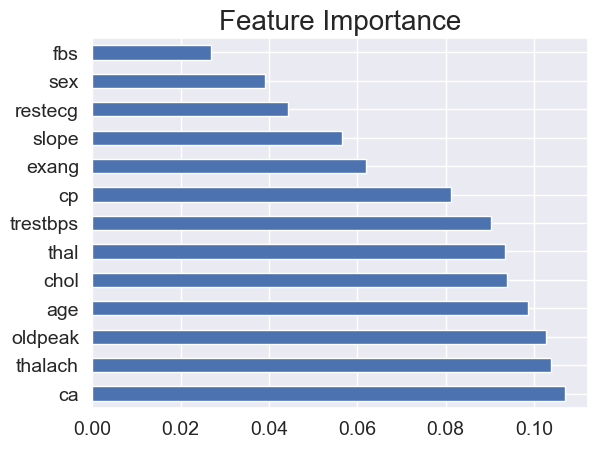

In [32]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')

plt.xticks(fontsize=14, fontweight='normal')
plt.yticks(fontsize=14, fontweight='normal')

# Set font properties for title
plt.title('Feature Importance', fontsize=20)

# Show plot
plt.show()

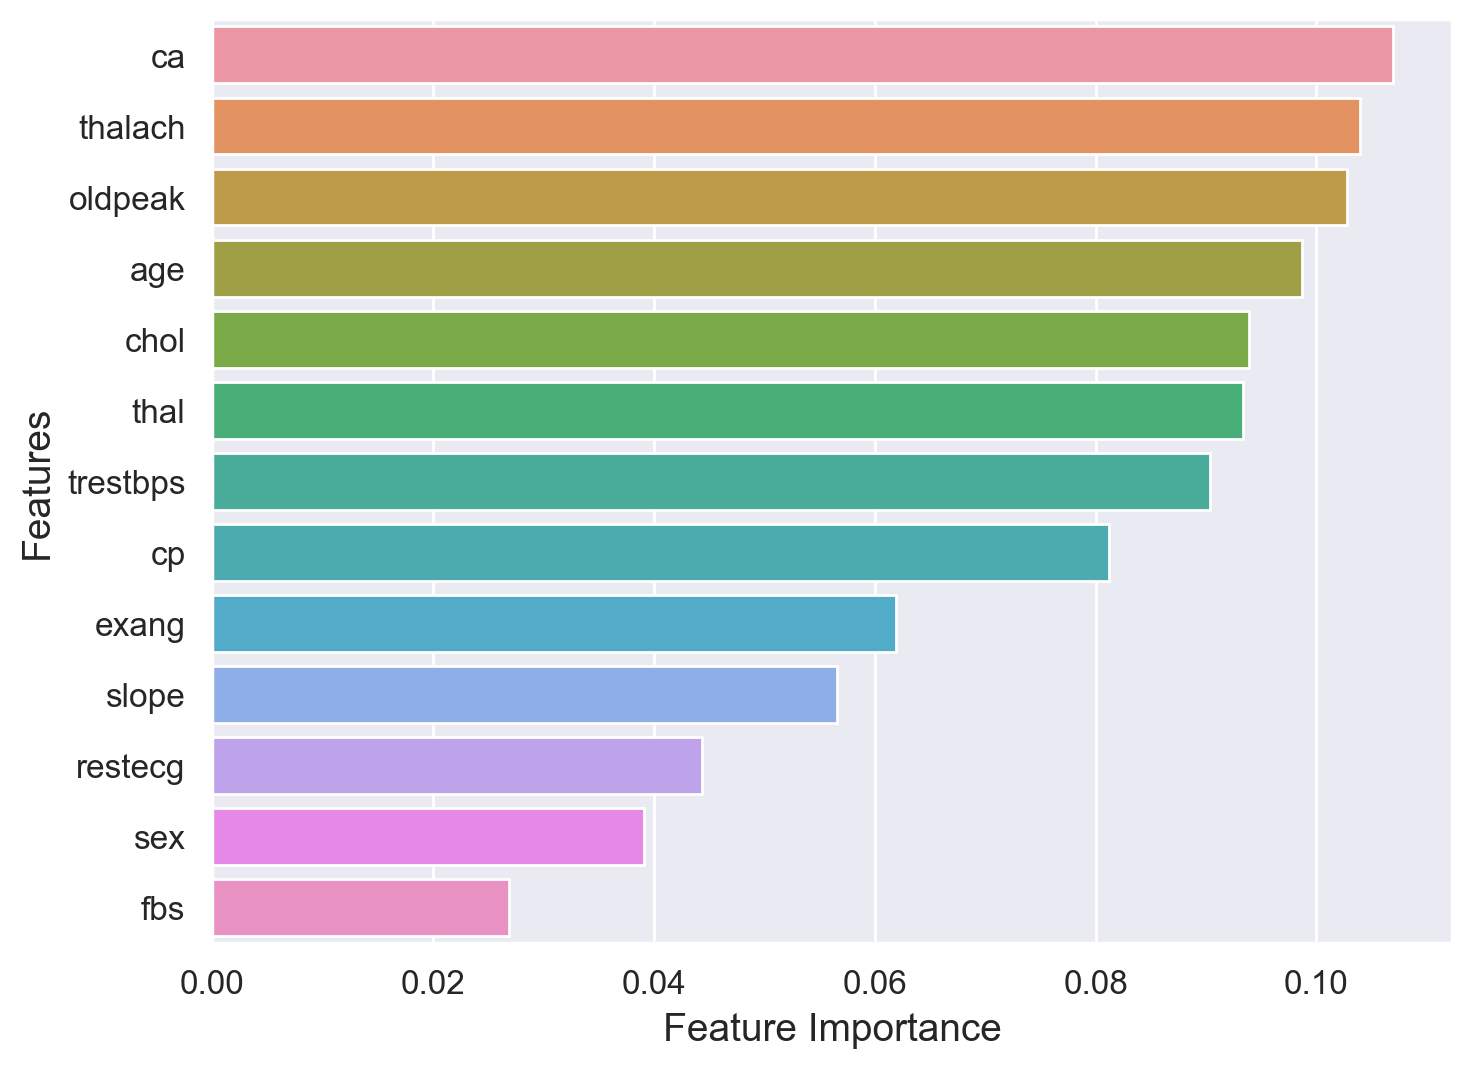

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Set the figure size and resolution
plt.figure(figsize=(8, 6), dpi=200)

# Create a horizontal bar plot
sns.barplot(x=feat_importances.nlargest(13), y=feat_importances.nlargest(13).index)

# Set x-axis and y-axis labels
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Set font properties for x-axis and y-axis tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set font properties for title
# plt.title('Feature Importance', fontsize=16)

# Show plot
plt.show()


## Machine Learning

In [34]:
models = {
    "XGBoost":XGBClassifier(max_depth=10, n_estimators=1000, 
                                  learning_rate=0.001, objective='multi:softmax', num_class=len(set(y))),
          "SVM":SVC(kernel='linear'),
          "Random Forest":RandomForestClassifier(n_estimators=500, random_state=42),
          "Logistic Regression":LogisticRegression(max_iter=10000000),
          "KNN":KNeighborsClassifier(n_neighbors=20),
          "Decision Tree":DecisionTreeClassifier(),
          "Adaboost":AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=5000, learning_rate=0.001)  
         }



In [35]:
def print_res(X_test, y_test, model):    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
#     auc_roc = roc_auc_score(y_test, y_pred)
#     auc_roc = roc_auc_score(y_test, y_pred, multi_class='ovr')
    print(f"\nAccuracy = {accuracy:.4f}\nPrecision = {precision:.4f}\nRecall = {recall:.4f}\nF1 Score = {f1:.4f}")
    print(f"AUC-ROC Score = {auc_roc:.4f}")

In [36]:
%time

model_names = list(models.keys())
for i in range(len(list(models))):
    model_name = model_names[i]
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    print("\nPerformance for Testing SET for: ", model_name)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy = {accuracy:.4f}\nPrecision = {precision:.4f}\nRecall = {recall:.4f}\nF1 Score = {f1:.4f}")

    if model_name == "XGBoost":
        auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        print(f"AUC-ROC Score = {auc_roc:.4f}")
    if (model_name == "Random Forest") or model_name == "KNN" or model_name == "Logistic Regression" or model_name == "Decision Tree" or model_name == "Adaboost":
        y_prob = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        print(f"AUC-ROC Score = {auc_roc:.4f}")
        
    if model_name == "SVM":
        y_score = model.decision_function(X_test)
        y_prob = np.exp(y_score) / np.sum(np.exp(y_score), axis=1, keepdims=True)
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        print(f"AUC-ROC Score = {auc_roc:.4f}")


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs

Performance for Testing SET for:  XGBoost
Accuracy = 0.5410
Precision = 0.5390
Recall = 0.5410
F1 Score = 0.5384
AUC-ROC Score = 0.7672

Performance for Testing SET for:  SVM
Accuracy = 0.5902
Precision = 0.5628
Recall = 0.5902
F1 Score = 0.5734
AUC-ROC Score = 0.7142

Performance for Testing SET for:  Random Forest
Accuracy = 0.5574
Precision = 0.5108
Recall = 0.5574
F1 Score = 0.5034
AUC-ROC Score = 0.7736

Performance for Testing SET for:  Logistic Regression
Accuracy = 0.6066
Precision = 0.5617
Recall = 0.6066
F1 Score = 0.5821
AUC-ROC Score = 0.7938

Performance for Testing SET for:  KNN
Accuracy = 0.5410
Precision = 0.6631
Recall = 0.5410
F1 Score = 0.4012
AUC-ROC Score = 0.6453

Performance for Testing SET for:  Decision Tree
Accuracy = 0.4590
Precision = 0.4610
Recall = 0.4590
F1 Score = 0.4594
AUC-ROC Score = 0.5958

Performance for Testing SET for:  Adaboost
Accuracy = 0.5902
Precision = 0.6041
Recall = 0.5902

In [37]:
import warnings

# Set the warning level to ignore
warnings.filterwarnings('ignore')


# Hyperparameter Tuning

## GSCV

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the models and their respective hyperparameter search spaces
models = {
    "XGBoost": {
        "model": XGBClassifier(objective='multi:softmax', num_class=len(set(y))),
        "params": {
            'max_depth': [5, 10, 15],
            'n_estimators': [100, 500, 1000],
            'learning_rate': [0.01, 0.1, 0.5],
        }
    },
    "SVM": {
        "model": SVC(kernel='linear'),
        "params": {
            'C': [1, 10, 100],
            'kernel': ['linear', 'rbf'],
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [100, 500, 1000],
            'max_features': ['sqrt', 'log2', None],
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=10000000),
        "params": {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [5, 10, 15],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    "Adaboost": {
        "model": AdaBoostClassifier(),
        "params": {
            'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
            'n_estimators': [50, 100, 500],
            'learning_rate': [0.01, 0.1, 1],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    }
}

# Loop over the models and their hyperparameter search spaces
for model_name, model_data in models.items():
    print("Tuning hyperparameters for", model_name)
    
    # Create an instance of the GridSearchCV object for this model
    model = model_data['model']
    params = model_data['params']
    gs = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=1)
    
    # Fit the GridSearchCV object to the training data
    gs.fit(X_train, y_train)
    
    # Print the best hyperparameters and the corresponding score
    print("Best hyperparameters:", gs.best_params_)
    print("Best score:", gs.best_score_)
    print("\n\n")


Tuning hyperparameters for XGBoost
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500}
Best score: 0.5703231292517008



Tuning hyperparameters for SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters: {'C': 1, 'kernel': 'linear'}
Best score: 0.5825680272108843



Tuning hyperparameters for Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters: {'max_features': 'sqrt', 'n_estimators': 1000}
Best score: 0.6115646258503402



Tuning hyperparameters for Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.6159013605442177



Tuning hyperparameters for KNN
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}
Best score: 0.5375

/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/Users/simran/opt/anaconda3/lib/python

Best hyperparameters: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 100}
Best score: 0.6076530612244898





In [40]:
%time
models = {
    "XGBoost":XGBClassifier(max_depth=10, n_estimators=500, 
                                  learning_rate=0.01
#                             , objective='multi:softmax', num_class=len(set(y))
                           ),
          "SVM":SVC(C=1, kernel='linear'),
          "Random Forest":RandomForestClassifier(max_features='sqrt', n_estimators=1000
#                                                  , random_state=42
                                                ),
          "Logistic Regression":LogisticRegression(C=1,penalty='l1',solver='saga',
#                                                    max_iter=10000000
                                                  ),
          "KNN":KNeighborsClassifier(algorithm='auto', n_neighbors=15,weights='uniform'),
          "Decision Tree":DecisionTreeClassifier(criterion='gini',max_depth=5, 
                                                 min_samples_leaf=2, min_samples_split=10),
          "Adaboost":AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(max_depth=1), 
                                        learning_rate=0.1, n_estimators=100)
#               estimator=DecisionTreeClassifier(max_depth=1), n_estimators=5000, learning_rate=0.001)  
         }


model_names = list(models.keys())
for i in range(len(list(models))):
    model_name = model_names[i]
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    print("\nPerformance for Testing SET for: ", model_name)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy = {accuracy:.4f}\nPrecision = {precision:.4f}\nRecall = {recall:.4f}\nF1 Score = {f1:.4f}")

    if model_name == "XGBoost":
        auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        print(f"AUC-ROC Score = {auc_roc:.4f}")
    if (model_name == "Random Forest") or model_name == "KNN" or model_name == "Logistic Regression" or model_name == "Decision Tree" or model_name == "Adaboost":
        y_prob = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        print(f"AUC-ROC Score = {auc_roc:.4f}")
        
    if model_name == "SVM":
        y_score = model.decision_function(X_test)
        y_prob = np.exp(y_score) / np.sum(np.exp(y_score), axis=1, keepdims=True)
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        print(f"AUC-ROC Score = {auc_roc:.4f}")


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.87 µs

Performance for Testing SET for:  XGBoost
Accuracy = 0.5574
Precision = 0.5296
Recall = 0.5574
F1 Score = 0.5407
AUC-ROC Score = 0.7575

Performance for Testing SET for:  SVM
Accuracy = 0.5902
Precision = 0.5628
Recall = 0.5902
F1 Score = 0.5734
AUC-ROC Score = 0.7142

Performance for Testing SET for:  Random Forest
Accuracy = 0.5574
Precision = 0.5086
Recall = 0.5574
F1 Score = 0.5027
AUC-ROC Score = 0.7694

Performance for Testing SET for:  Logistic Regression
Accuracy = 0.5410
Precision = 0.5725
Recall = 0.5410
F1 Score = 0.4190
AUC-ROC Score = 0.6816

Performance for Testing SET for:  KNN
Accuracy = 0.5574
Precision = 0.5770
Recall = 0.5574
F1 Score = 0.4422
AUC-ROC Score = 0.6621

Performance for Testing SET for:  Decision Tree
Accuracy = 0.4426
Precision = 0.4982
Recall = 0.4426
F1 Score = 0.4407
AUC-ROC Score = 0.6825

Performance for Testing SET for:  Adaboost
Accuracy = 0.6066
Precision = 0.5964
Recall = 0.6066
F

## RSCV

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the models and their respective hyperparameter search spaces
models = {
    "XGBoost": {
        "model": XGBClassifier(objective='multi:softmax', num_class=len(set(y))),
        "params": {
            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5, 1],
            'n_estimators': [100, 500, 1000, 5000],
            'objective': ['multi:softmax'],
            'num_class': [len(set(y_train))],
            'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'gamma': [0, 1, 5],
            'reg_alpha': [0, 0.01, 0.1, 1],
            'reg_lambda': [0, 0.01, 0.1, 1],
            'min_child_weight': [1, 3, 5, 7]
        }
    },
    "SVM": {
        "model": SVC(kernel='linear'),
        "params": {
            'C': [1, 10, 100],
            'kernel': ['linear', 'rbf'],
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [100, 500, 1000],
            'max_features': ['sqrt', 'log2', None],
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=10000000),
        "params": {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [5, 10, 15],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    "Adaboost": {
        "model": AdaBoostClassifier(),
        "params": {
            'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
            'n_estimators': [50, 100, 500],
            'learning_rate': [0.01, 0.1, 1],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    }
}

# Loop over the models and their hyperparameter search spaces
for model_name, model_data in models.items():
    print("Tuning hyperparameters for", model_name)
    model = model_data['model']
    params = model_data['params']    
    scorer = make_scorer(f1_score, average='weighted')
    rscv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=10, cv=5, 
                              verbose=2, random_state=42, n_jobs=-1, scoring=scorer)
    rscv.fit(X_train, y_train)
    best_model = rscv.best_estimator_
    best_params = rscv.best_params_
    print(f"Best Parameters: {best_params}")
    print(f"Best Parameters: {best_model}")
    
    print("\n\n")


Tuning hyperparameters for XGBoost
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.3, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'objective': 'multi:softmax', 'num_class': 5, 'n_estimators': 5000, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.001, 'gamma': 1, 'colsample_bytree': 1}
Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=50

/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/simran/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification

Best Parameters: {'n_estimators': 500, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=2), 'algorithm': 'SAMME.R'}
Best Parameters: AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=500)



[CV] END colsample_bytree=1, gamma=1, learning_rate=0.001, max_depth=2, min_child_weight=3, n_estimators=5000, num_class=5, objective=multi:softmax, reg_alpha=0.1, reg_lambda=0.01, subsample=0.3; total time=   2.6s
[CV] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, num_class=5, objective=multi:softmax, reg_alpha=0.1, reg_lambda=0, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, gamma=5, learning_rate=0.001, max_depth=8, min_child_weight=1, n_estimators=100, num_class=5, objective=multi:softmax, reg_alpha=1, reg_lambda=1, subsample=0.2; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=1, max_depth=6, min_child_weight=3, n

In [43]:
%time
models = {
    "XGBoost":XGBClassifier(subsample=0.3, reg_lambda=0.01, reg_alpha=0.1, objective='multi:softmax', 
                            num_class=5, n_estimators=5000, min_child_weight=3, max_depth=2,
                            learning_rate=0.001, gamma=1, colsample_bytree=1),
          "SVM":SVC(C=100, kernel='linear'),
          "Random Forest":RandomForestClassifier(max_features='sqrt', n_estimators=1000
                                                 , random_state=42
                                                ),
          "Logistic Regression":LogisticRegression(C=100,penalty='l1',solver='saga',
                                                   max_iter=10000000
                                                  ),
          "KNN":KNeighborsClassifier(
              weights='distance', n_neighbors=10, algorithm='ball_tree'),
          "Decision Tree":DecisionTreeClassifier(criterion='gini',max_depth=5, 
                                                 min_samples_leaf=2, min_samples_split=10),
          "Adaboost":AdaBoostClassifier(algorithm='SAMME.R', estimator=DecisionTreeClassifier(max_depth=2), 
                                        learning_rate=1, n_estimators=500)
#               estimator=DecisionTreeClassifier(max_depth=1), n_estimators=5000, learning_rate=0.001)  
         }


model_names = list(models.keys())
for i in range(len(list(models))):
    model_name = model_names[i]
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    print("\nPerformance for Testing SET for: ", model_name)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy = {accuracy:.4f}\nPrecision = {precision:.4f}\nRecall = {recall:.4f}\nF1 Score = {f1:.4f}")

    if model_name == "XGBoost":
        auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        print(f"AUC-ROC Score = {auc_roc:.4f}")
    if (model_name == "Random Forest") or model_name == "KNN" or model_name == "Logistic Regression" or model_name == "Decision Tree" or model_name == "Adaboost":
        y_prob = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        print(f"AUC-ROC Score = {auc_roc:.4f}")
        
    if model_name == "SVM":
        y_score = model.decision_function(X_test)
        y_prob = np.exp(y_score) / np.sum(np.exp(y_score), axis=1, keepdims=True)
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        print(f"AUC-ROC Score = {auc_roc:.4f}")


CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs

Performance for Testing SET for:  XGBoost
Accuracy = 0.6557
Precision = 0.6472
Recall = 0.6557
F1 Score = 0.6188
AUC-ROC Score = 0.8207

Performance for Testing SET for:  SVM
Accuracy = 0.5574
Precision = 0.5232
Recall = 0.5574
F1 Score = 0.5391
AUC-ROC Score = 0.6754

Performance for Testing SET for:  Random Forest
Accuracy = 0.5410
Precision = 0.5040
Recall = 0.5410
F1 Score = 0.4935
AUC-ROC Score = 0.7743

Performance for Testing SET for:  Logistic Regression
Accuracy = 0.6557
Precision = 0.6541
Recall = 0.6557
F1 Score = 0.6243
AUC-ROC Score = 0.7891

Performance for Testing SET for:  KNN
Accuracy = 0.5410
Precision = 0.4045
Recall = 0.5410
F1 Score = 0.4235
AUC-ROC Score = 0.6204

Performance for Testing SET for:  Decision Tree
Accuracy = 0.4426
Precision = 0.4982
Recall = 0.4426
F1 Score = 0.4407
AUC-ROC Score = 0.6825

Performance for Testing SET for:  Adaboost
Accuracy = 0.4590
Precision = 0.5188
Recall = 